# Exploring

An exoplanet `Population` is designed to be a (hopefully!) relatively easy way to interact with data for a group of exoplanet systems. Here we step through the basics of how we can explore a population of planets, access standardized planet properties, and filter subsets of planet populations.

## Getting started
The `exoatlas` package contains the tools we will use. All planet properties inside a population have astropy [units](https://docs.astropy.org/en/stable/units/) associated with them, so we make also want to have access to those units for our calculations.

In [1]:
import exoatlas as ea
import astropy.units as u

We can always check what version of `exoatlas` we're using with its hidden `.__version__`.

In [2]:
ea.__version__

'0.2.4'

## Create a `Population`
Now, to get started, we'll make a population that contains all confirmed transiting exoplanets. We can read more about the different populations we can create over one the [Creating](creating.html) page. When we create this population, the code will download a table of the latest data from the NASA Exoplanet Archive.

In [3]:
pop = ea.TransitingExoplanets()

/Users/zkbt/.exoatlas/data/standardized-TransitingExoplanets.txt is 0.009 days old.
Should it be updated? [y/N]
[transitingexoplanets] Loaded standardized table from /Users/zkbt/.exoatlas/data/standardized-TransitingExoplanets.txt


(The code will let you know how long ago your local dataset was updated, and ask if you'd like to update it now.)

## What's inside a `Population`?
The core ingredient to an exoplanet `Population` is a table of planet properties that have been standardized and populated with astropy units. This `pop.standard` table is an astropy [Table](https://docs.astropy.org/en/stable/table/), so its contents can be accessed or modified as any other astropy `Table`.

In [4]:
pop.standard

name,ra,dec,period,semimajoraxis,e,omega,inclination,transit_epoch,transit_duration,transit_depth,stellar_teff,stellar_radius,stellar_mass,UJmag,VJmag,BJmag,RCmag,ICmag,Jmag,Hmag,Kmag,WISE1mag,WISE2mag,WISE3mag,WISE4mag,radius,radius_uncertainty_upper,radius_uncertainty_lower,transit_ar,transit_b,rv_semiamplitude,mass,mass_uncertainty_upper,mass_uncertainty_lower,distance,distance_uncertainty_upper,distance_uncertainty_lower,discoverer
,deg,deg,d,AU,,deg,deg,d,d,,K,solRad,solMass,,,,,,,,,,,,,earthRad,earthRad,earthRad,,,,earthMass,earthMass,earthMass,pc,pc,pc,
str17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str44
55Cnce,133.149216,28.330818,0.736539,0.01544,nan,nan,83.3,2455733.013,nan,nan,5196.0,0.94,0.91,nan,5.96,6.83,nan,nan,4.768,4.265,4.015,4.001,3.296,4.051,4.014,1.91,0.08,-0.08,nan,0.41,nan,8.08,0.31,-0.31,12.59,0.01,-0.01,McDonald Observatory
BD+20594b,53.650967,20.599232,41.6855,nan,0.0,nan,89.55,nan,nan,0.00049,5766.0,1.08,1.67,nan,11.038,11.728,nan,nan,9.77,9.432,9.368,9.31,9.344,9.332,8.976,2.578,0.112,-0.112,55.8,nan,3.1,22.2481,9.5349,-9.5349,180.39,1.25,-1.25,K2
CoRoT-10b,291.063708,0.746143,13.2406,0.1055,0.53,218.9,88.55,2454273.3436,0.1242,0.0161036,5075.0,0.79,0.89,nan,15.22,16.68,nan,nan,12.527,11.929,11.782,11.64,11.752,11.396,8.923,10.87,0.78,-0.78,31.33,0.85,301.0,874.0,50.85,-50.85,345.0,70.0,-70.0,CoRoT
CoRoT-11b,280.687263,5.937688,2.99433,0.0436,0.0,nan,83.17,2454597.679,0.1042,0.011449,6440.0,1.37,1.27,nan,12.939,13.596,nan,nan,11.589,11.416,11.248,11.173,11.265,11.47,9.198,16.03,0.34,-0.34,6.89,0.818,280.0,740.51,108.06,-108.06,560.0,30.0,-30.0,CoRoT
CoRoT-12b,100.765677,-1.296439,2.828042,0.04016,0.07,105.0,85.48,2454398.62707,0.10726,0.01744,5675.0,1.12,1.08,nan,15.515,16.343,nan,nan,14.024,13.63,13.557,13.47,13.47,12.53,8.61,16.14,1.46,-1.46,nan,0.573,125.5,291.438,22.247,-20.658,1150.0,85.0,-85.0,CoRoT
CoRoT-13b,102.721137,-5.086445,4.03519,0.051,0.0,nan,88.02,2454790.8091,0.1308,nan,5945.0,1.01,1.09,nan,15.039,15.777,nan,nan,13.71,13.406,13.376,13.17,13.217,12.615,8.946,9.92,0.157,-0.157,10.81,0.374,157.8,415.704,20.976,-20.976,1060.0,100.0,-100.0,CoRoT
CoRoT-14b,103.424211,-5.536037,1.51214,0.027,0.0,nan,79.6,2454787.6694,0.0693,nan,6035.0,1.21,1.13,nan,16.033,16.891,nan,nan,14.321,14.007,13.806,13.679,13.729,12.03,9.14,12.22,0.78,-0.78,4.78,0.86,1230.0,2415.4,190.7,-190.7,1340.0,110.0,-110.0,CoRoT
CoRoT-16b,278.524691,-6.002595,5.35227,0.0618,0.33,168.41,85.01,2454923.9138,0.0996,0.0102,5650.0,1.19,1.1,nan,15.63,16.68,nan,nan,13.496,12.98,12.847,nan,nan,nan,nan,13.11,1.79,-1.57,11.2,0.825,61.96,170.032,27.014,-26.379,840.0,90.0,-90.0,CoRoT


If desired, columns could be added to this standardized table:

In [5]:
import numpy as np
N = len(pop)
pop.standard['something'] = np.arange(N) + 5

## How do we access planet properties?
The main way to access planet properties within a `Populatoin` is with its attributes. That is, we can access an array of the values for some property `x` by calling `pop.x`. Behind the scenes, the population will look to see if there is a column called `"x"` in the standardized table and return that column. For example, we can get an array of planet names with:

In [6]:
pop.name

array(['55Cnce', 'BD+20594b', 'CoRoT-10b', ..., 'XO-5b', 'XO-6b',
       'piMenc'], dtype='<U17')

Even columns that we separately added to the standardized table can be accessed as attributes:

In [7]:
pop.something

<Quantity [   5,    6,    7, ..., 3137, 3138, 3139]>

We also have access to quantities that are not directly included in the table itself but can be calculated from them. For example, we can get an array of the amount of insolation that the planets receive from their stars as:

In [8]:
pop.insolation

[transitingexoplanets] 1626/3135 semimajoraxes are missing
[transitingexoplanets] 0/3135 are still missing after NVK3L


<Quantity [3313157.14969688,   20290.40189733,   45613.96244702, ...,
            513270.25674635, 1402428.87108827,  421394.84382526] W / m2>

In this case, the insolation is calculated from the planet's orbital separation and the luminosity of the star (which is itself calculated from the stellar effective temperature and radius).

If information needed to do a calculation is missing, `exoatlas` will try to estimate them from other available information. In the `.insolation` case, some planets had no semimajor axes defined in the `.standard` table, but we were able to calculate this quantity from the orbital period, the stellar mass, and Newton's Version of Kepler's 3rd Law.

Short descriptions of some common attributes can printed with the `describe_columns()` function.

In [9]:
ea.describe_columns()

               name = name of the planet
                 ra = Right Ascension of the system
                dec = Declination of the system
           distance = distance to the system
   distance_modulus = apparent magnitude - absolute magnitude
         discoverer = telescope/project that found this planet
       stellar_teff = stellar effective temperature
       stellar_mass = stellar mass
     stellar_radius = stellar radius
 stellar_luminosity = luminosity of the star
 stellar_brightness = photon flux from the star at Earth (a function of wavelength)
             period = orbital period of the planet
      semimajoraxis = the semimajor axis of the planet's orbit
          a_over_rs = scaled orbital distance a/R*
                  b = impact parameter b
                  e = eccentricity
              omega = argument of periastron
             radius = planet radius
               mass = planet mass
            density = density of the planet
         insolation = bolometric ene

With this toolkit, you can now access the data you need to make some pretty fundamental plots in exoplanetary science. For example:

[transitingexoplanets] 1626/3135 semimajoraxes are missing
[transitingexoplanets] 0/3135 are still missing after NVK3L


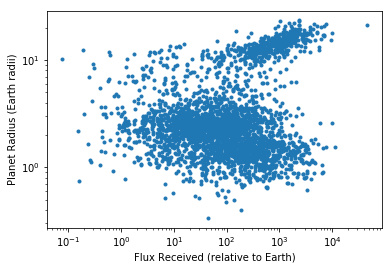

In [10]:
import matplotlib.pyplot as plt
plt.loglog(pop.relative_insolation, pop.radius, '.')
plt.xlabel('Flux Received (relative to Earth)')
plt.ylabel('Planet Radius (Earth radii)');

## How do we access some sub-population of planets?
Often we'll want to pull out some subset of a population. We might want a smaller sample of planets, or all the planets that meet some particular criterion, or maybe the properties of one individual planet. In our experience with `numpy` arrays or `astropy` tables, we've often done this by indexing (`x[0]` or `x[[0, 1, 5]]`), slicing (`x[3:30]`), or masking (`x[some_array > some_other_array]`). 

We can apply the same methods to a `Population`, creating smaller populations by indexing, slicing, or masking. Anything we can do with a `Population` we can do with one of these sub-`Population`s that we create.

In [11]:
pop

<Transiting Exoplanets | population of 3135 planets>

In [12]:
one_planet = pop[0]
one_planet

<ExoplanetSubsets of Transiting Exoplanets | population of 1 planets>

In [13]:
one_planet.name, one_planet.radius, one_planet.insolation

   [population] 0/1 semimajoraxes are missing
   [population] 0/1 are still missing after NVK3L


(array(['55Cnce'], dtype='<U17'),
 <Quantity [1.91] earthRad>,
 <Quantity [3313157.14969688] W / m2>)

In [14]:
prime_planets = pop[[2, 3, 5, 7, 11, 13, 17, 19, 23]]
prime_planets

<ExoplanetSubsets of Transiting Exoplanets | population of 9 planets>

In [15]:
first_ten = pop[:10]
first_ten

<ExoplanetSubsets of Transiting Exoplanets | population of 10 planets>

In [16]:
every_other_exoplanet = pop[::2]
every_other_exoplanet

<ExoplanetSubsets of Transiting Exoplanets | population of 1568 planets>

In [17]:
small = pop[pop.radius < 4*u.Rearth]
small

<ExoplanetSubsets of Transiting Exoplanets | population of 2433 planets>

Additionally, we can extract an individual planet or a list of planets by indexing the population with planet name(s). This is using astropy tables' `.loc` functionality, with `"name"` being used as an index.

In [18]:
cute_planet = pop['GJ 1214b']
cute_planet

<ExoplanetSubsets of Transiting Exoplanets | population of 1 planets>

In [19]:
cute_planets = pop[['LHS 1140b', 'GJ 1214b', 'GJ 436b']]
cute_planets

<ExoplanetSubsets of Transiting Exoplanets | population of 3 planets>

## Explore!
That's about it. For more information about different pre-defined populations see [Creating](creating.html), and for more about pre-packaged visualizations see [Visualizing](visualizing.html).